In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

import dtale

In [3]:
data = pd.read_csv('weatherAUS.csv')

In [4]:
data =  data.dropna(how='any',axis=0)

In [5]:
# d  = dtale.show(data.iloc[:10000,:])
# d

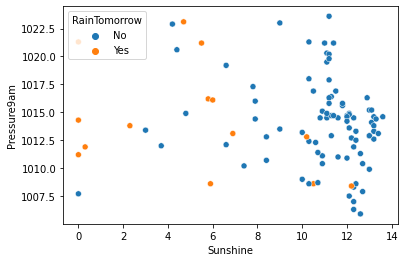

In [6]:
fig = plt.figure()

Cmap_bold = ['Darkorange','c']

sns.scatterplot(y = data['Pressure9am'][:100],x = data['Sunshine'][:100], hue=data['RainTomorrow'][:100])
plt.show()


¿Como podríamos diferenciar una etiqueta de la otra?

<IPython.core.display.Javascript object>


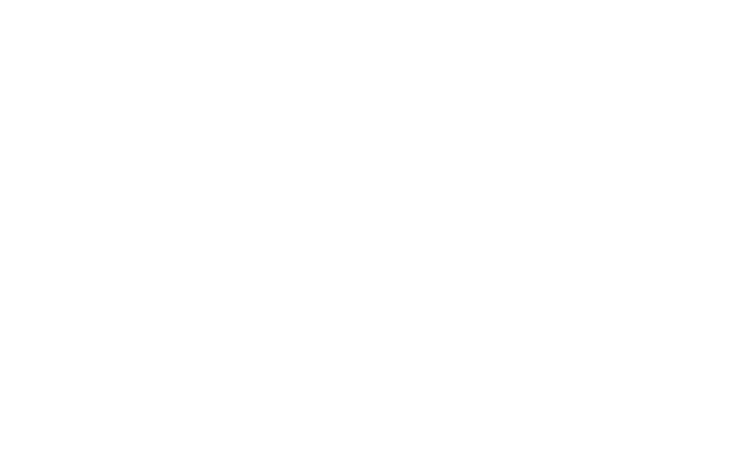

In [7]:
%matplotlib notebook
fig = plt.figure(figsize=(5,3))

plt.style.use('seaborn')

xx = np.linspace(0,14)

Cmap_bold = ['Darkorange','c']

sns.scatterplot(y = data['Pressure9am'][:50],x = data['Sunshine'][:50], hue=data['RainTomorrow'][:50])

for a, b in [(1003.5,1.1)]:
    yy = a + b*xx
    plt.plot(xx,yy,'-k',c = 'r')
    
plt.title('SVC')    
plt.show()

<IPython.core.display.Javascript object>


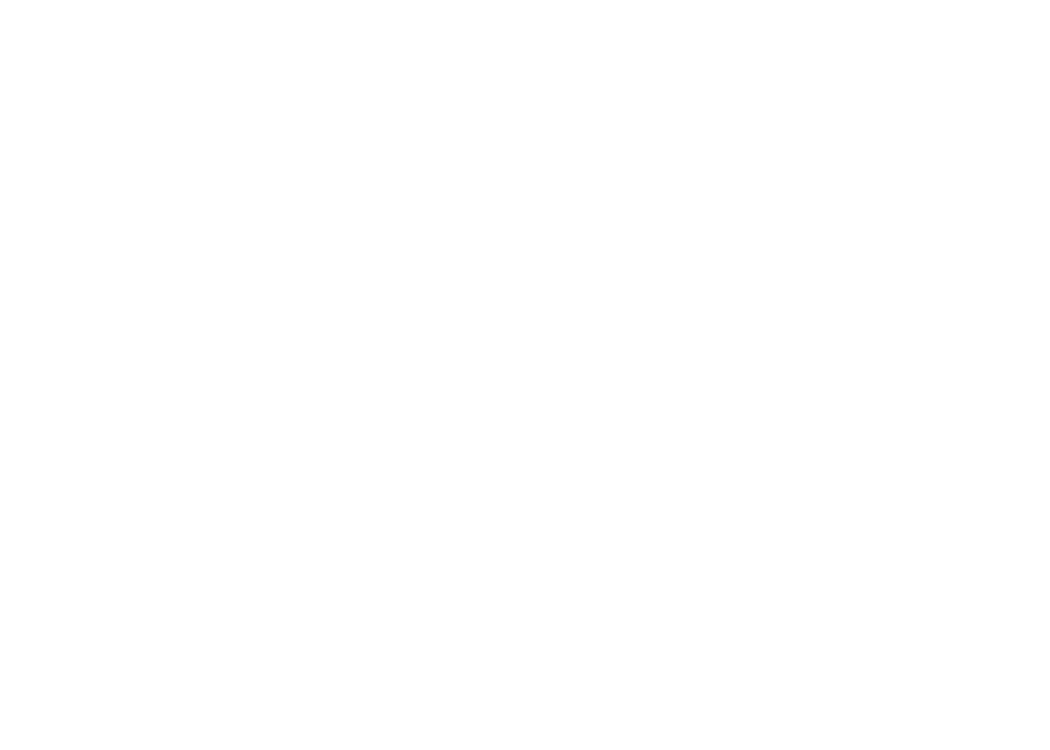

In [8]:
%matplotlib notebook
fig = plt.figure(figsize=(7,5))

plt.style.use('seaborn')

xx = np.linspace(0,14)

Cmap_bold = ['Darkorange','c']

sns.scatterplot(y = data['Pressure9am'][:50],x = data['Sunshine'][:50], hue=data['RainTomorrow'][:50])

for a,b,d in [(1003.5,1.1,1.1)]:
    yy = a + b*xx
    plt.plot(xx,yy,'-k',c = 'r')
    plt.fill_between(xx,yy-d,yy+d,edgecolor = 'none', color = '#BBBBBB',alpha = 0.8 )
    
plt.title('SVC')    
plt.show()

<IPython.core.display.Javascript object>


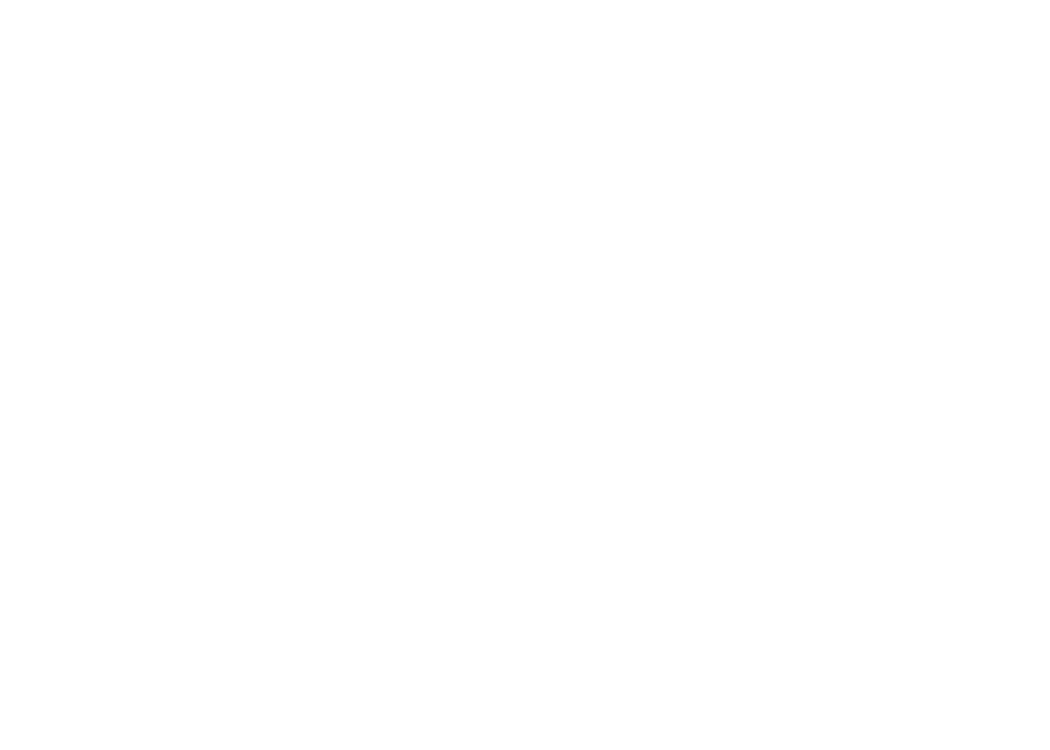

In [9]:
fig = plt.figure(figsize=(7,5))

plt.style.use('seaborn')

xx = np.linspace(0,14)

Cmap_bold = ['Darkorange','c']

sns.scatterplot(y = data['Pressure9am'][:50],x = data['Sunshine'][:50], hue=data['RainTomorrow'][:50])

for a,b,d in [(1003.5,1.1,1.1),(1010,-0.086,0.59)]:
    yy = a + b*xx
    plt.plot(xx,yy,'-k',c = 'r')
    plt.fill_between(xx,yy-d,yy+d,edgecolor = 'none', color = '#BBBBBB',alpha = 0.6 )
    
plt.show()

***
___

In [10]:
encoder = LabelEncoder()

y = np.array(data['RainTomorrow'])
encoder = encoder.fit(y)
y = encoder.transform(y)
X = np.array(data[['Sunshine','Pressure9am']])


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=14)

y_train,y_test = y_train[:100],y_test[:100]
X_train,X_test = X_train[:100,:],X_test[:100,:]


svc_lineal = SVC(kernel='linear',C=1000, probability=True).fit(X_train,y_train)

<IPython.core.display.Javascript object>


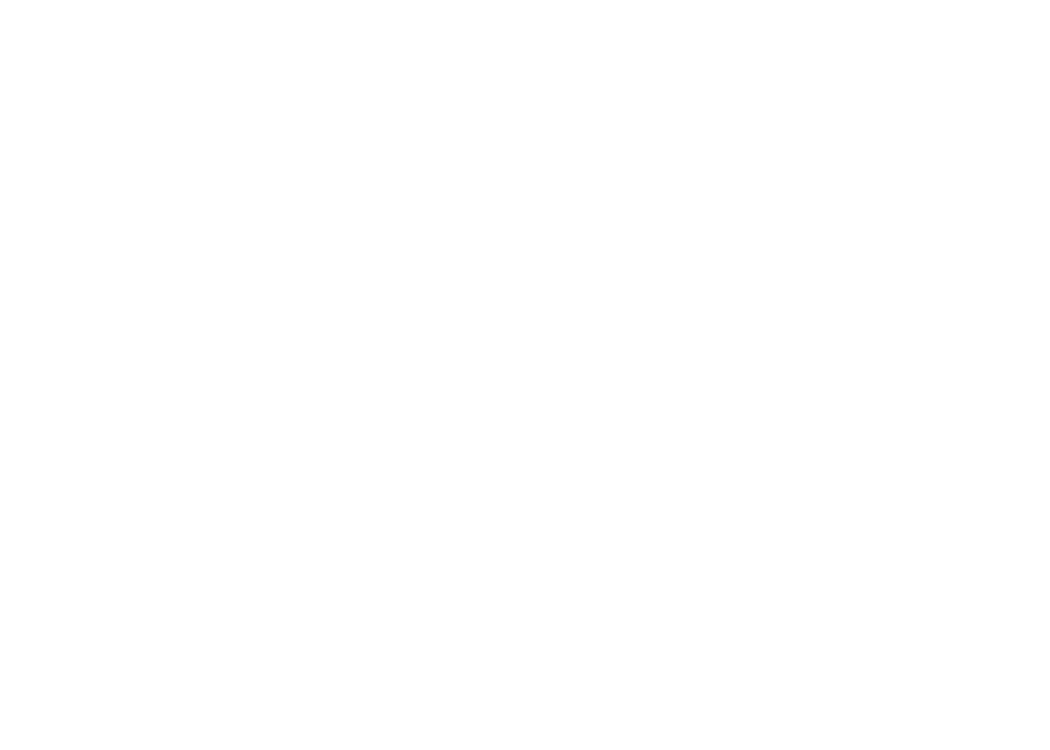

In [11]:
fig = plt.figure(figsize=(7,5))
cmap_light = ListedColormap(['orange', 'cyan'])

xmin,xmax = X_train[:,0].min()-1, X_train[:,0].max()+1
ymin,ymax = X_train[:,1].min()-1, X_train[:,1].max()+1


xx = np.linspace(xmin,xmax)
yy = np.linspace(ymin,ymax)

XX,YY = np.meshgrid(xx,yy)
XY = np.vstack([XX.ravel(),YY.ravel()]).T

P = svc_lineal.predict(XY).reshape(XX.shape)
dec_funct = svc_lineal.decision_function(XY).reshape(XX.shape)

plt.contourf(XX,YY,P,cmap = cmap_light, alpha = 0.6)
plt.contourf(XX,YY,dec_funct,levels=[-1,0,1])

sns.scatterplot(x=X_train[:,0],y=X_train[:,1],hue=encoder.inverse_transform(y_train),palette=Cmap_bold)

# plt.scatter(svc_lineal.support_vectors_[:,0],
#            svc_lineal.support_vectors_[:,1],c='b')


plt.title('SVC Lineal , C = 10')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.show()

***
___

In [12]:
encoder = LabelEncoder()

y = np.array(data['RainTomorrow'])
encoder = encoder.fit(y)
y = encoder.transform(y)
X = np.array(data[['Pressure9am','Sunshine']])


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=14)

y_train,y_test = y_train[:100],y_test[:100]
X_train,X_test = X_train[:100,:],X_test[:100,:]


<IPython.core.display.Javascript object>


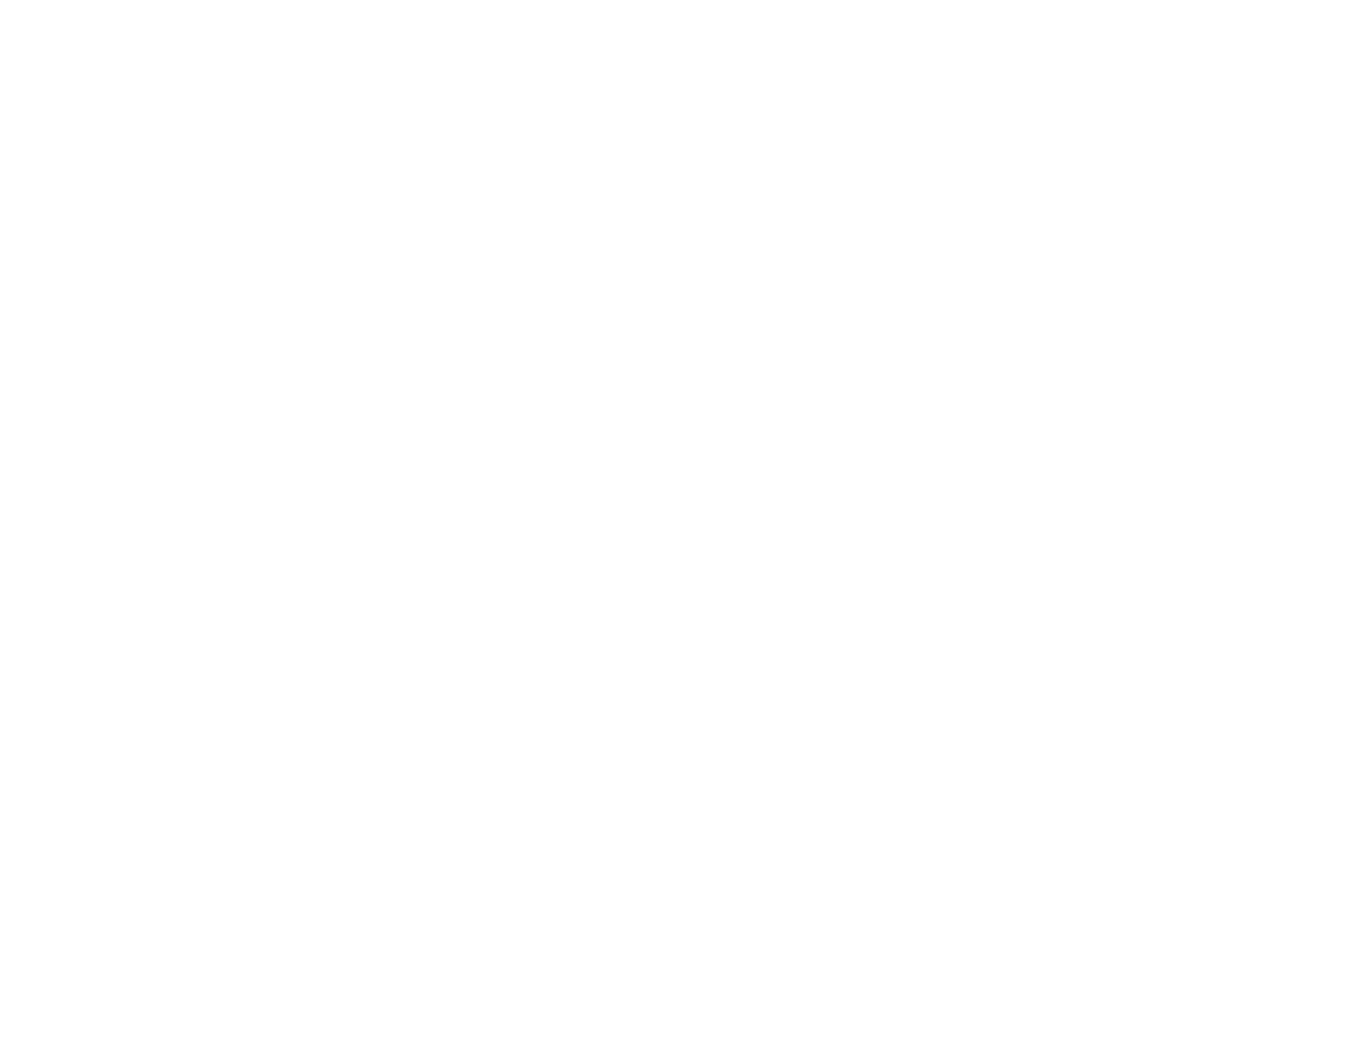

In [13]:
xmin,xmax = X_train[:,0].min()-1, X_train[:,0].max()+1
ymin,ymax = X_train[:,1].min()-1, X_train[:,1].max()+1


xx = np.linspace(xmin,xmax)
yy = np.linspace(ymin,ymax)

XX,YY = np.meshgrid(xx,yy)
XY = np.vstack([XX.ravel(),YY.ravel()]).T

fig = plt.figure(figsize=(9,7))

C = [1.0,100,1000,1E8]
subplot = [1,2,3,4]
for i,s in zip(C,subplot):
    svc_lineal = SVC(kernel='linear',C=i).fit(X_train,y_train)
    P = svc_lineal.predict(XY).reshape(XX.shape)
    
    plt.subplot(2,2,s)
    plt.contourf(XX,YY,P,cmap = cmap_light, alpha = 0.6)

    sns.scatterplot(x=X_train[:,0],y=X_train[:,1],hue=encoder.inverse_transform(y_train),palette=Cmap_bold)

    plt.title('SVC Lineal , C = {}'.format(i))
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)

plt.tight_layout()
plt.show()

***
----

***
___

In [14]:
def plot_svc(kernel,C,X_train,X_test,y_train,y_test):
    
    #################################################
    
    #Modelo
    svc_ = SVC(kernel=kernel,C=C).fit(X_train,y_train)
    svc_predict_ = svc_.predict(X_test)
    
    print("train score: ", svc_.score(X_train,y_train),"\n",
     "test score: ", svc_.score(X_test,y_test),"\n",
     "accuracy: ", accuracy_score(y_test,svc_predict_))
    
    #################################################
    
    xmin,xmax = X_train[:,0].min()-1, X_train[:,0].max()+1
    ymin,ymax = X_train[:,1].min()-1, X_train[:,1].max()+1


    xx = np.linspace(xmin,xmax)
    yy = np.linspace(ymin,ymax)

    XX,YY = np.meshgrid(xx,yy)
    XY = np.vstack([XX.ravel(),YY.ravel()]).T
    P = svc_.predict(XY).reshape(XX.shape)
    
    #Plot
    fig = plt.figure(figsize=(9,7))
    
    num_categ = len(pd.Series(y_train).value_counts())
    colors_light = ['#77DDFF', '#77FFA9',"#FAED78"]
    colors_bold = ['#0097E8','#00E854',"#FAE324"]
    cmap_light = ListedColormap(colors_light[:num_categ])
    Cmap_bold = colors_bold[:num_categ]

    plt.contourf(XX,YY,P,cmap = cmap_light, alpha = 0.6)

    sns.scatterplot(x=X_train[:,0],y=X_train[:,1],hue=y_train,palette=Cmap_bold)

    plt.title("kernel = " + svc_.kernel + " C = " + str(svc_.C))
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)

    plt.tight_layout()
    return plt.show()

***
___

***
___

# SVM Kernelizados

In [15]:
from sklearn.datasets import make_circles, make_blobs
X,Y = make_circles(100, factor=.1, noise=.1, random_state=14)
X1, Y1 = make_blobs(n_features=2, centers=3, random_state=14)

<IPython.core.display.Javascript object>


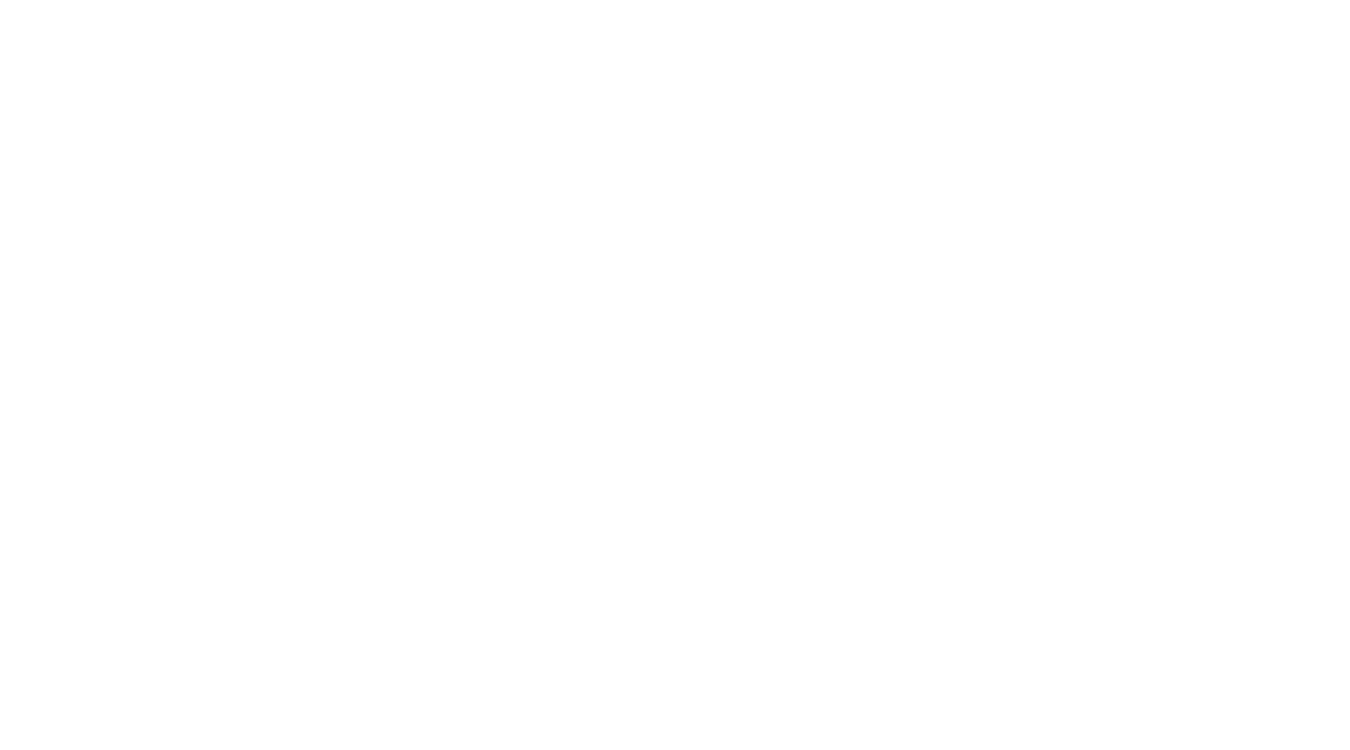

In [16]:
fig = plt.figure(figsize=(9,5))

plt.subplot(1,2,1)
sns.scatterplot(x=X[:,0],y=X[:,1], hue = Y, s = 50, cmap='viridis')

plt.subplot(1,2,2)
sns.scatterplot(x=X1[:, 0],y= X1[:, 1], hue=Y1, s=70, edgecolor='white',palette='inferno')

plt.show()

***
___

In [17]:
from ipywidgets import interact,fixed

In [18]:
interact(plot_svc,kernel=['linear','poly','rbf','sigmoid'],C=[10,100,10000],
         X_train=fixed(X1),X_test=fixed(X1),y_train=fixed(Y1),y_test=fixed(Y1))

interactive(children=(Dropdown(description='kernel', options=('linear', 'poly', 'rbf', 'sigmoid'), value='line…

<function __main__.plot_svc(kernel, C, X_train, X_test, y_train, y_test)>

In [19]:
interact(plot_svc,kernel=['linear','poly','rbf','sigmoid'],C=[1,100,10000],
         X_train=fixed(X),X_test=fixed(X),y_train=fixed(Y),y_test=fixed(Y))

interactive(children=(Dropdown(description='kernel', options=('linear', 'poly', 'rbf', 'sigmoid'), value='line…

<function __main__.plot_svc(kernel, C, X_train, X_test, y_train, y_test)>

***
___

In [20]:
def col(array):
    colores = []
    for i in array:
        if i == 0:
            c = 'b'
        else:
            c = 'g'
        colores.append(c)
    return colores

<IPython.core.display.Javascript object>


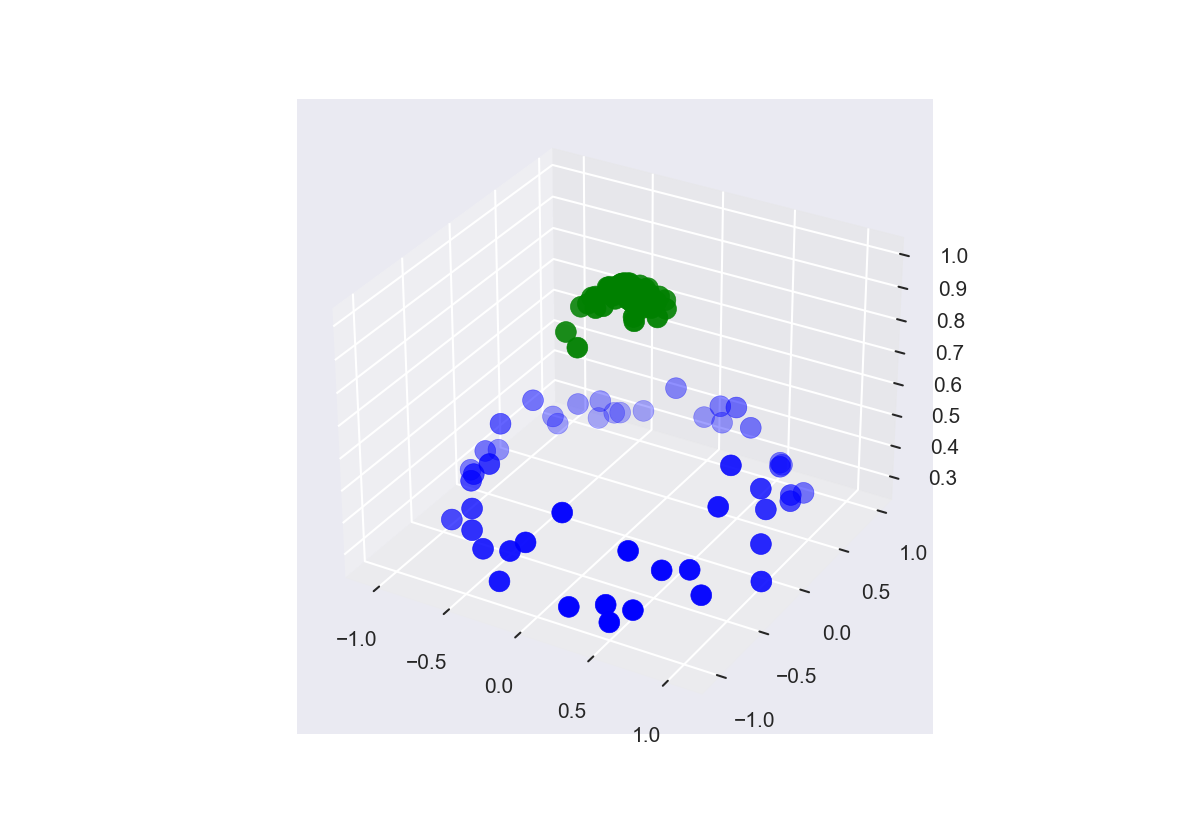

In [21]:
Z = np.exp(-(X**2).sum(1))
colores = col(Y)

%matplotlib notebook
fig = plt.figure()
plt.style.use('seaborn')
ax = plt.subplot(projection='3d')
ax.scatter(X[:,0],X[:,1],Z,c=colores,s=100)

plt.show()

***
___

## <p><span style="color: #ff0000;">Ejercicio</span></p>

1. Tome dos variables de la base de datos ``weatherAUS.csv`` eliga dos variables predictoras, utilice la columna ``RainTomorrow`` y entrene un modelo SVC con kernel lineal, rbf, poly y sigmoid, pruebe al menos 4 valores para C, eliga el modelo con mejor accuracy 


2. grafique la frontera de decisión en un plano de 2 dimensiones

In [ ]:
data =  data.dropna(how='any',axis=0)

In [24]:
y = np.array(data['RainTomorrow'])[:10000]
X = np.array(data[['MaxTemp','WindGustSpeed']])[:10000]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25)


kernels = ['rbf','linear']
# C = [1.0,100,1000]
for k in kernels:
    modelo = SVC(kernel=k,C=10,probability=False).fit(X_train,y_train)

    modelo_predicciones = modelo.predict(X_test)
    #     modelo_prob_predicciones = modelo.predict_proba(X_test)

    train_score = modelo.score(X_train,y_train)
    test_score = modelo.score(X_test,y_test)

    accuracy = accuracy_score(y_test,modelo_predicciones)
    
    print("""
    con el kernel: {}
    train_score: {}
    test_score: {}
    accuracy: {}
    """.format(k,train_score,test_score,accuracy))




    con el kernel: rbf
    train_score: 0.7597333333333334
    test_score: 0.766
    accuracy: 0.766
    

    con el kernel: linear
    train_score: 0.7568
    test_score: 0.7644
    accuracy: 0.7644
    


In [ ]:
mod